# Découverte de la description des variables

In [2]:
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
files = [ file for file in os.listdir(r'C:\Sales_US')]
for file in files:
        print(file)                            
    

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
import pandas as pd
path = r'C:\Sales_US'
big_data = (pd.DataFrame())
for file in files:
    current_data= pd.read_csv(path+'/'+file)
    big_data= pd.concat([big_data, current_data])
print(big_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [6]:
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [8]:
big_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [9]:
big_data.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [11]:
big_data.shape

(186850, 6)

In [12]:
donnee_janvier = pd.read_csv(path+'/'+'/Sales_January_2019.csv')
donnee_janvier.shape

(9723, 6)

In [ ]:
# transformation en un fichier csv

In [13]:
big_data.to_csv(path+'/big_data.csv', index=False)

In [14]:
big_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [17]:
big_data.isna().sum()  # 545 missing values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
# les valeurs manquantes et suppression
#Drop the rows where at least one element is missing:
#df.dropna()
#Drop the columns where at least one element is missing:df.dropna(axis='columns')
#Drop the rows where all elements are missing: dropna(how=all)

In [16]:
big_data = big_data.dropna(how='all')
big_data.shape

(186305, 6)

In [ ]:
#2 step

In [18]:
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# le mois durant lequel le meilleur chiffre d'affaire est réalisé?


In [19]:
def month(x):
    return x.split('/')[0]


In [20]:
big_data['Month']= big_data['Order Date'].apply(month)

In [21]:
big_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [22]:
big_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [23]:
big_data = big_data[big_data['Month']!='Order Date']

In [24]:
big_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [25]:
big_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [26]:
big_data['Month']= big_data['Month'].astype(int)

<ipython-input-26-daaf92364ad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data['Month']= big_data['Month'].astype(int)


In [27]:
big_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [28]:
big_data['Price Each']= big_data['Price Each'].astype(float)
big_data['Quantity Ordered']= big_data['Quantity Ordered'].astype(int)

<ipython-input-28-d58d88f280f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data['Price Each']= big_data['Price Each'].astype(float)
<ipython-input-28-d58d88f280f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data['Quantity Ordered']= big_data['Quantity Ordered'].astype(int)


In [30]:
big_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [32]:
big_data['sales']= big_data['Quantity Ordered'] *big_data['Price Each']  

<ipython-input-32-a7f24a5a2c66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data['sales']= big_data['Quantity Ordered'] *big_data['Price Each']


In [33]:
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [35]:
# grouper par mois la somme des ventes(sales)
big_data.groupby('Month')['sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

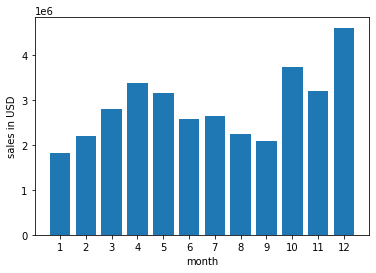

In [38]:
month= range(1,13)
plt.bar(month, big_data.groupby('Month')['sales'].sum())
plt.xticks(month)
plt.ylabel('sales in USD')
plt.xlabel('month')
plt.show()

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>]], dtype=object)

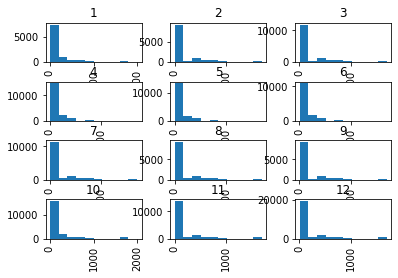

In [41]:
# histogramme de ventes( sales) par mois

big_data.hist(column='sales',by='Month')

# Dans quelle ville nous avons enregistre  un maximum de commmande?

In [43]:
'682 Chestnut St, Boston, MA 02215'.split(',')[1]

' Boston'

In [1]:
def city(x):
    return x.split(',')[1]


In [2]:
big_data['city']= big_data['Purchase Address'].apply(city)

NameError: name 'big_data' is not defined

In [46]:
big_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [6]:
import pandas as pd
df = pd.read_csv('big_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
big_data = df

In [8]:
big_data = big_data.dropna(how='all')
big_data.shape
#df.dropna(inplace = True)  supprime toutes les lignes NAN

(186305, 6)

In [9]:
def month(x):
    return x.split('/')[0]


In [10]:
big_data['Month']= big_data['Order Date'].apply(month)

<ipython-input-10-6857972316fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data['Month']= big_data['Order Date'].apply(month)


In [28]:
big_data2 = big_data.copy()

In [29]:
big_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [12]:
big_data 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [ ]:
big_data['Month']= big_data['Month'].astype(int)

In [14]:
big_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [33]:
big_data = big_data.astype({"Month":'int'}) 
#df = df.astype({"Name":'category', "Age":'int64'}) 


ValueError: invalid literal for int() with base 10: 'Order Date'